# K-Nearest Neighbors Classification

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Implement algorithm

In [335]:
def classifyNewX(train_X, train_y, test_X, k):
    
    dists = np.linalg.norm(train_X - test_X, axis = 1)
    
    ## order is the index position of sorted items in dists
    order = dists.argsort()
    ## ranks is the index position in dists of the ranked orders
    ranks = order.argsort()

    top_k_ranks = ranks <= k - 1
    top_k_y = train_y[top_k_ranks]

    values, counts = np.unique(top_k_y, return_counts=True)

    test_y_index = np.argmax(counts)
    test_y = values[test_y_index]
    print("Predicted class: {:d}".format(test_y))
    return test_y

## Test on simple 2d data

In [342]:
test_samples = 50
test_classes = 3

train_X = None
train_y = None

for c in range(test_classes):
    c_loc = np.random.randint(low = -2, high = 2)
    c_scale = np.random.random() + .3
    print(c, c_loc, c_scale)
    temp_train_X = np.random.normal(loc = c_loc,
                                   scale = c_scale,
                                   size = (math.ceil(test_samples/test_classes), 2))
    temp_train_y = np.repeat(c, math.ceil(test_samples/test_classes))
    if c == 0:
        train_X = temp_train_X
        train_y = temp_train_y
    else:
        train_X = np.append(train_X, temp_train_X, axis = 0)
        train_y = np.append(train_y, temp_train_y)
        
test_X = np.random.normal(loc = np.random.randint(low = -2, high = 2),
                          scale = np.random.random() + .3,
                          size = (1, 2))

0 -1 0.8706003715746886
1 0 0.8561619638677929
2 0 0.3346727181979628


In [343]:
for k in range(1, 11):
    print(k)
    test_y = classifyNewX(train_X, train_y, test_X, k)

1
Predicted class: 1
2
Predicted class: 0
3
Predicted class: 0
4
Predicted class: 2
5
Predicted class: 1
6
Predicted class: 1
7
Predicted class: 1
8
Predicted class: 1
9
Predicted class: 1
10
Predicted class: 1


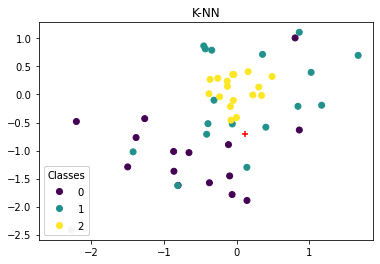

In [344]:
fig, ax = plt.subplots()

scatter = ax.scatter(train_X[:,0], train_X[:,1], c=train_y, label = train_y)
ax.scatter(test_X[:,0], test_X[:,1], c = 'red', marker = '+', label = 'new')

legend = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend)
plt.title("K-NN")
plt.show()

## Test on MNIST dataset

In [345]:
from sklearn.datasets import load_digits

In [380]:
digits = load_digits()
data = digits.data
target = digits.target

In [387]:
num_samples = 60
train_X = data[:num_samples,:]
train_y = target[:num_samples]

In [400]:
test_index = np.random.randint(low = num_samples + 1, high = data.shape[0])
test_X = data[test_index,:].reshape(1, -1)
test_y = target[test_index]
print(test_index, test_y)

879 3


In [401]:
for k in range(1, 11):
    test_y = classifyNewX(train_X, train_y, test_X, k)

Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
Predicted class: 3
